## Objective of the Exercise

The database includes data from 140 famous users of all over the world. The users are classified on 9 different categories (work activities) which are: 

- Actor
- Singer
- Model
- Tv, series
- Radio
- Technology
- Sports
- Politics
- Writer

## Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min

%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (9, 9)
plt.style.use('ggplot')

## Reading the Database

In [2]:
dataframe = pd.read_csv(r"analisis.csv")
dataframe.head()

,usuario,op,co,ex,ag,ne,wordcount,categoria
0,3gerardpique,34.297953,28.148819,41.948819,29.370315,9.841575,37.0945,7
1,aguerosergiokun,44.986842,20.525865,37.938947,24.279098,10.362406,78.7970,7
2,albertochicote,41.733854,13.745417,38.999896,34.645521,8.836979,49.2604,4
3,AlejandroSanz,40.377154,15.377462,52.337538,31.082154,5.032231,80.4538,2
4,alfredocasero1,36.664677,19.642258,48.530806,31.138871,7.305968,47.0645,4


### Variables:

username of the famous

«op» = Openness to experience

«co» = Conscientiousness 

«ex» = Extraversion 

«ag» = Agreeableness 

«ne» = Neuroticism

wordcount – Average words per tweet

category (work activity)

In [3]:
# Generate descriptive statistics
dataframe.describe()

,op,co,ex,ag,ne,wordcount,categoria
count,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000
mean,44.414591,22.977135,40.764428,22.918528,8.000098,98.715484,4.050000
std,8.425723,5.816851,7.185246,7.657122,3.039248,44.714071,2.658839
min,30.020465,7.852756,18.693542,9.305985,1.030213,5.020800,1.000000
25%,38.206484,19.740299,36.095722,17.050993,6.086144,66.218475,2.000000
50%,44.507091,22.466718,41.457492,21.384554,7.839722,94.711400,3.500000
75%,49.365923,26.091606,45.197769,28.678867,9.758189,119.707925,7.000000
max,71.696129,49.637863,59.824844,40.583162,23.978462,217.183200,9.000000


In [4]:
# Number of elements per category
print(dataframe.groupby('categoria').size())

categoria
1    27
2    34
3     9
4    19
5     4
6     8
7    17
8    16
9     6
dtype: int64


## Visualizations

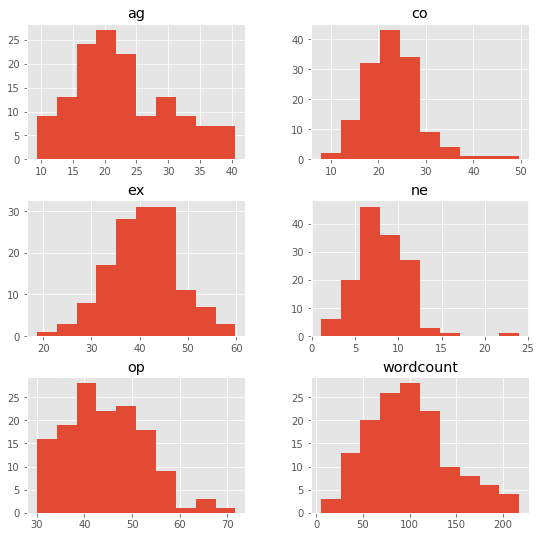

In [5]:
# Histograms of the data per variable
dataframe.drop(['categoria'], 1).hist()
plt.show()

### Note:
For this exercise, only 3 variables will be analized: op, ex and ag. With 3 variables, it will make possible to analize results with graphs (3 variables = 3 dimensions).

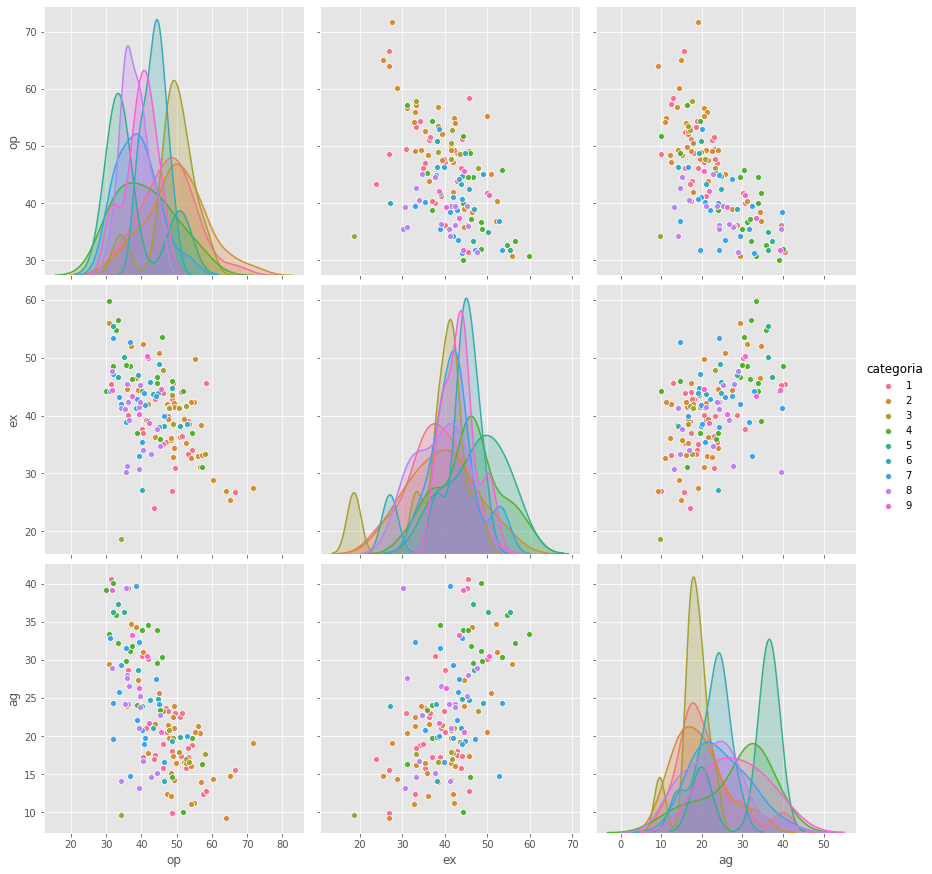

In [6]:
# The following graphs check if correlation between variables exists.
sb.pairplot(dataframe.dropna(), hue='categoria',height=4,vars=["op","ex","ag"],kind='scatter')

### Note: 
From the previous graph there is not correlation.

## Scatter plot

In [7]:
X = np.array(dataframe[["op","ex","ag"]])
y = np.array(dataframe['categoria'])

Text(0.5, 0, 'ag')

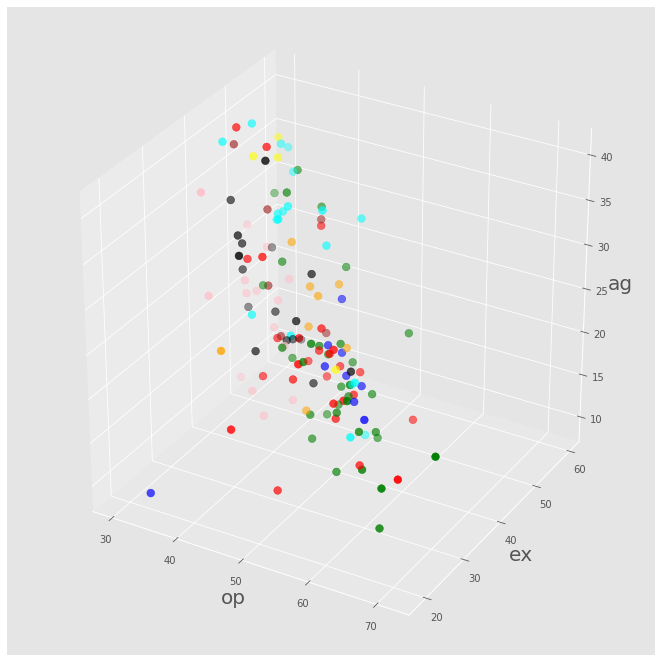

In [8]:
# 3 Dims graph
fig = plt.figure()
ax = Axes3D(fig)
# Each color assign to a different category
colores=['blue','red','green','blue','cyan','yellow','orange','black','pink','brown','purple']
asignar=[]
for row in y:
    asignar.append(colores[row])
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60)
ax.set_xlabel('op', fontsize=20)
ax.set_ylabel('ex', fontsize=20)
ax.set_zlabel('ag', fontsize=20)

## Number of clusters (K) to classify the data

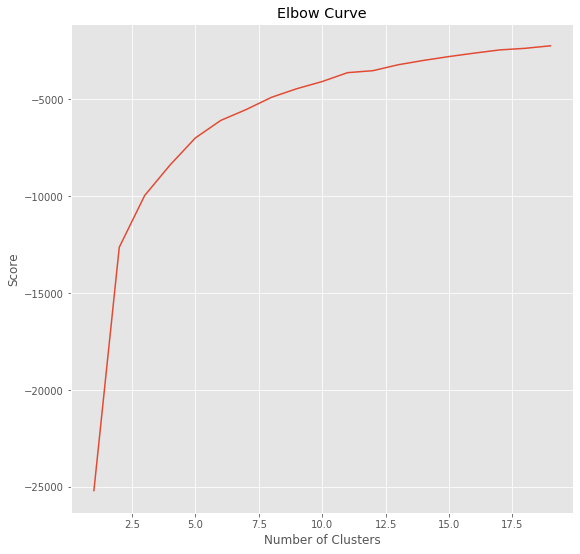

In [9]:
# Elbow Method to determine number of clusters
# According to the following graph, 5 clusters will be used

Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

## K-Means

In [10]:
# The Kmeans function from the Sklearn library is called for the model
kmeans = KMeans(n_clusters=5, random_state=0).fit(X)

# The centroids of the different clusters are obtained
centroids = kmeans.cluster_centers_
print(centroids)

[[58.70462307 30.53566167 15.72207033]
 [39.55874337 44.81190669 24.291027  ]
 [35.39154169 47.17372597 34.50044186]
 [50.15530371 40.81295548 17.39048745]
 [42.66891482 33.31008136 21.11530482]]


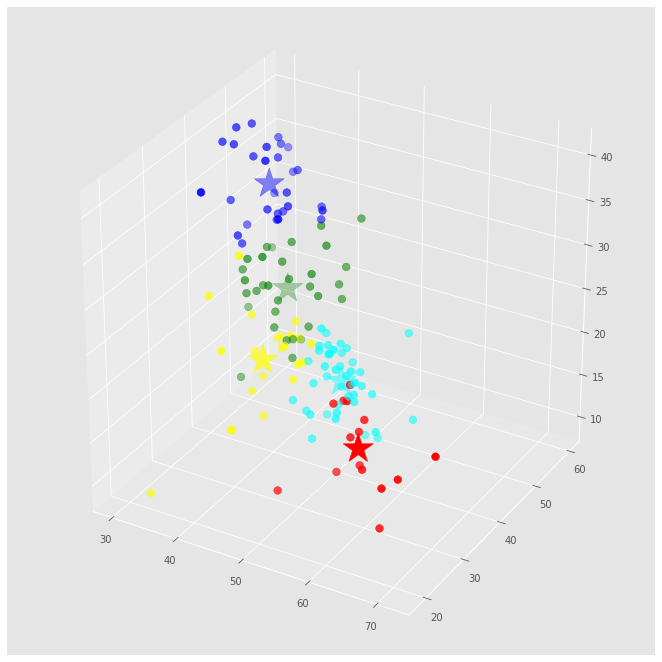

In [11]:
# The following graph shows the clusters and their elements
labels = kmeans.predict(X)

C = kmeans.cluster_centers_
colores=['red','green','blue','cyan','yellow']
asignar=[]
for row in labels:
    asignar.append(colores[row])

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60)

ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c=colores, s=1000)

In [12]:
# Number of users grouped on each cluster
copy =  pd.DataFrame()

copy['usuario'] = dataframe['usuario'].values
copy['categoria'] = dataframe['categoria'].values
copy['label'] = labels;

cantidadGrupo =  pd.DataFrame()
cantidadGrupo['color'] = colores
cantidadGrupo['cantidad'] = copy.groupby('label').size()
cantidadGrupo

,color,cantidad
0,red,15
1,green,32
2,blue,29
3,cyan,42
4,yellow,22


## We will analize the first cluster
The majority of users of this cluster belong to the category 1 and 2. It can be said that this cluster contains actors and singers. The following dataframe shows the quantity of users per category in cluster 1.

In [13]:
group_referrer_index = copy['label'] == 0
group_referrals = copy[group_referrer_index]

diversidadGrupo =  pd.DataFrame()
diversidadGrupo['categoria']=[0,1,2,3,4,5,6,7,8,9]
diversidadGrupo['cantidad']=group_referrals.groupby('categoria').size()
diversidadGrupo

,categoria,cantidad
0,0,NaN
1,1,5.0
2,2,8.0
3,3,1.0
4,4,1.0
5,5,NaN
6,6,NaN
7,7,NaN
8,8,NaN
9,9,NaN


## Classify new users

In [14]:
# Now that the model is trained, new predictions can be made
# It is the turn to test the model with David Guetta
X_new = np.array([[45.92,57.74,15.66]]) 
 
new_labels = kmeans.predict(X_new)
print(new_labels + 1)

[2]


### Note:
David Guetta was grouped on the cluster number 2.